# Analysing evaluation results for with new route file

In [1]:
import os
import pandas as pd
import numpy as np
import sys 

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

sys.path.append(os.path.abspath('../'))
from data_analysis_functions import generate_summary_df_from_csv, \
                                    get_df_from_csv, \
                                    get_trained_and_fixed_from_csv, \
                                    generate_summary_df_from_csv_for_4x4grid_resco # type: ignore

In [2]:
path_to_save_figs = "images_for_report_4x4"
figsize = (10,6)

In [3]:
eval_folder_type = "new_route_file"

In [4]:
TRAINED_CHECKPOINT_PATHS = [f"azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_reduced_obs_3s/EVALUATION/{eval_folder_type}/PPO_2024-05-21_21_57__alpha_1_neighbour_observations_3s",
                            f"azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_3s_continue/EVALUATION/{eval_folder_type}/PPO_2024-05-25_02_37__alpha_1"
                            ]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [5]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    trained_1_reduced_obs_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_1_reduced_obs",
                                    seed = seed)
    trained_1_entire_obs_continued_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_1_continued",
                                    seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df,
                                    trained_1_entire_obs_continued_df,
                                    trained_1_reduced_obs_df], axis=0)

    return alpha_experiment_df

get dfs for all seeds, and concat

In [6]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 39, 22]
SUMO_SEEDS = [39, 22, 10, 51, 49, 74]
SUMO_SEEDS = [31]
alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined
# alpha_dfs


sys_abs_accel_episode_mean  sys_abs_accel_episode_mean_var  sys_abs_accel_episode_rms  sys_abs_accel_episode_var  sys_abs_accel_episode_rms_with_integ  sys_abs_accel_episode_sum  sys_abs_accel_episode_integral  sys_abs_accel_episode_ms  sys_avg_speed_episode_mean  sys_avg_speed_episode_max  sys_avg_speed_episode_min  sys_avg_speed_episode_range  sys_avg_speed_episode_median  sys_avg_speed_episode_variance  sys_total_stopped_episode_mean  sys_avg_waiting_time_total_episode_mean  sys_avg_waiting_time_episode_mean  tot_agent_accum_wait_time
fixed_tc                                56.839251                        0.041206                  58.623262                 206.027591                             58.620934              284196.253577                   284170.134119               3436.686807                    7.842623                  11.124681                        0.0                    11.124681                      7.932307                        1.473811                         20.3472                                 385.2274                           5.162456                120379.0000
trained_1_continued                     55.752132                        0.021544                  56.709779                 107.720390                             56.708031              278760.657532                   278738.397324               3215.999013                    8.301324                  10.901164                        0.0                    10.901164                      8.314801                        0.517110                         16.7912                                 370.2614                           5.182884                115700.0625
trained_1_reduced_obs                   52.763272                        0.018657                  53.639795                  93.283387                             53.637765              263816.358818                   263793.027152               2877.227577                    9.247845                  11.294137                        0.0                    11.294137                      9.258644                        0.415986                         10.4372                                 165.5528                           2.589683                 51730.6875

In [7]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

sys_abs_accel_episode_mean  sys_abs_accel_episode_mean_var  sys_abs_accel_episode_rms  sys_abs_accel_episode_var  sys_abs_accel_episode_rms_with_integ  sys_abs_accel_episode_sum  sys_abs_accel_episode_integral  sys_abs_accel_episode_ms  sys_avg_speed_episode_mean  sys_avg_speed_episode_max  sys_avg_speed_episode_min  sys_avg_speed_episode_range  sys_avg_speed_episode_median  sys_avg_speed_episode_variance  sys_total_stopped_episode_mean  sys_avg_waiting_time_total_episode_mean  sys_avg_waiting_time_episode_mean  tot_agent_accum_wait_time
fixed_tc                                56.839251                        0.041206                  58.623262                 206.027591                             58.620934              284196.253577                   284170.134119               3436.686807                    7.842623                  11.124681                        0.0                    11.124681                      7.932307                        1.473811                         20.3472                                 385.2274                           5.162456                120379.0000
trained_1_continued                     55.752132                        0.021544                  56.709779                 107.720390                             56.708031              278760.657532                   278738.397324               3215.999013                    8.301324                  10.901164                        0.0                    10.901164                      8.314801                        0.517110                         16.7912                                 370.2614                           5.182884                115700.0625
trained_1_reduced_obs                   52.763272                        0.018657                  53.639795                  93.283387                             53.637765              263816.358818                   263793.027152               2877.227577                    9.247845                  11.294137                        0.0                    11.294137                      9.258644                        0.415986                         10.4372                                 165.5528                           2.589683                 51730.6875

## Columns of interest to compare across:

In [8]:
subset_for_stats_test = df_average_whole_experiment[
                            ['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum',
                             "sys_abs_accel_episode_mean_var",
                             "sys_abs_accel_episode_var",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_integral", 
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean"]]

In [9]:
subset_for_stats_test = df_average_whole_experiment[
                            ['sys_abs_accel_episode_mean',
                             "sys_abs_accel_episode_sum",
                             "sys_avg_waiting_time_episode_mean",
                             'sys_abs_accel_episode_sum',
                             "sys_abs_accel_episode_var"]]

In [10]:
subset_for_stats_test

sys_abs_accel_episode_mean  sys_abs_accel_episode_sum  sys_avg_waiting_time_episode_mean  sys_abs_accel_episode_sum  sys_abs_accel_episode_var
fixed_tc                                56.839251              284196.253577                           5.162456              284196.253577                 206.027591
trained_1_continued                     55.752132              278760.657532                           5.182884              278760.657532                 107.720390
trained_1_reduced_obs                   52.763272              263816.358818                           2.589683              263816.358818                  93.283387

In [11]:
subset_for_stats_test.loc['fixed_tc']

sys_abs_accel_episode_mean               56.839251
sys_abs_accel_episode_sum            284196.253577
sys_avg_waiting_time_episode_mean         5.162456
sys_abs_accel_episode_sum            284196.253577
sys_abs_accel_episode_var               206.027591
Name: fixed_tc, dtype: float64

## Metrics During Evaluation

In [12]:
fixed_tc_eval_metrics_concat = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='fixed_tc', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_eval_metrics_concat =  pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_eval_metrics_reduced = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])

In [13]:
fixed_tc_eval_metrics_averaged_seeds = fixed_tc_eval_metrics_concat.groupby(fixed_tc_eval_metrics_concat.index).mean()

In [14]:
fixed_tc_eval_metrics_averaged_seeds = fixed_tc_eval_metrics_concat.groupby(fixed_tc_eval_metrics_concat.index).mean()
trained_eval_metrics_averaged_seeds = trained_eval_metrics_concat.groupby(trained_eval_metrics_concat.index).mean()
trained_eval_metrics_reduced_averaged_seeds = trained_eval_metrics_reduced.groupby(trained_eval_metrics_reduced.index).mean()

In [15]:
fixed_tc_eval_metrics_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       56.839251
std        14.353661
min         0.000000
25%        47.198953
50%        56.069319
75%        66.848605
max       106.313842
Name: system_abs_accel, dtype: float64

In [16]:
trained_eval_metrics_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       55.752132
std        10.378843
min         0.000000
25%        50.160066
50%        56.079639
75%        62.412686
max        95.950895
Name: system_abs_accel, dtype: float64

In [17]:
trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       52.763272
std         9.658333
min         0.000000
25%        47.146204
50%        53.202602
75%        58.907288
max        86.228281
Name: system_abs_accel, dtype: float64

## analysing waiting times

In [18]:
ids = ["A3", "B3", "C3", "D3",
       "A2", "B2", "C2", "D2",
       "A1", "B1", "C1", "D1",
       "A0", "B0", "C0", "D0"]

In [19]:
np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
                    np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_stopped'].mean() for id in ids])


(10.346137500000001, 10.4800875, 0.6518125)

In [20]:
np.mean([trained_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([trained_eval_metrics_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
            np.mean([trained_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])

(23.1400125, 23.6801125, 1.04875)

In [21]:
np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
        np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])

(24.0758, 24.8114, 1.2712625000000002)

In [22]:
fixed_tc_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'].sum(), \
    trained_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'].sum(), \
        trained_eval_metrics_reduced_averaged_seeds['sys_arrived_vehicles_at_destination'].sum()

(1977.0, 1978.0, 1988.0)

In [23]:
fixed_tc = {'Avg Wait': np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

fixed_df = pd.DataFrame(fixed_tc.values(), index=["Avg Wait", "Avg Queue"], columns=['fixed_tc'])

In [24]:
trained_CTCE = {'Avg Wait': np.mean([trained_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([trained_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

trained_CTCE_df = pd.DataFrame(trained_CTCE.values(), index=["Avg Wait", "Avg Queue"], columns=['NEE CTCE PPO'])

In [25]:
trained_DTDE = {'Avg Wait': np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

trained_DTDE_df = pd.DataFrame(trained_DTDE.values(), index=["Avg Wait", "Avg Queue"], columns=['NEE DTDE PPO'])

In [26]:
my_resco_results_df = pd.concat([fixed_df,trained_CTCE_df,trained_DTDE_df], axis=1)

In [27]:
my_resco_results_df.loc['Avg Wait', 'IDQN'] = 11.59
my_resco_results_df.loc['Avg Wait', 'MPLight'] = 20.21
my_resco_results_df.loc['Avg Wait', 'IPPO'] = 18.93
my_resco_results_df.loc['Avg Wait', 'FMA2C'] = 71.42

In [28]:
my_resco_results_df.loc['Avg Queue', 'IDQN'] = 0.33
my_resco_results_df.loc['Avg Queue', 'MPLight'] = 0.55
my_resco_results_df.loc['Avg Queue', 'IPPO'] = 0.5
my_resco_results_df.loc['Avg Queue', 'FMA2C'] = 1.74

In [29]:
my_resco_results_df

fixed_tc  NEE CTCE PPO  NEE DTDE PPO   IDQN  MPLight   IPPO  FMA2C
Avg Wait   24.075800     23.140013     10.346138  11.59    20.21  18.93  71.42
Avg Queue   1.271263      1.048750      0.651813   0.33     0.55   0.50   1.74

In [30]:
print(my_resco_results_df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & fixed_tc & NEE CTCE PPO & NEE DTDE PPO & IDQN & MPLight & IPPO & FMA2C \\
\midrule
Avg Wait & 24.075800 & 23.140013 & 10.346138 & 11.590000 & 20.210000 & 18.930000 & 71.420000 \\
Avg Queue & 1.271263 & 1.048750 & 0.651813 & 0.330000 & 0.550000 & 0.500000 & 1.740000 \\
\bottomrule
\end{tabular}



In [31]:
fixed_tc_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'][fixed_tc_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'] > 0.0]

88      1.0
102     1.0
104     1.0
143     1.0
145     1.0
179     1.0
182     1.0
185     2.0
188     1.0
192     1.0
194     2.0
202     1.0
203     1.0
208     2.0
213     1.0
222     1.0
231     1.0
233     1.0
234     2.0
236     1.0
239     1.0
242     1.0
250     1.0
255     1.0
256     3.0
259     1.0
262     2.0
263     1.0
269     1.0
271     1.0
272     1.0
277     1.0
284     1.0
285     1.0
286     1.0
292     1.0
296     2.0
298     1.0
300     1.0
301     1.0
302     1.0
303     1.0
310     1.0
312     1.0
314     1.0
320     1.0
324     3.0
325     1.0
326     1.0
327     1.0
333     1.0
334     1.0
336     2.0
337     2.0
339     1.0
345     1.0
352     1.0
353     1.0
354     1.0
361     1.0
371     2.0
373     1.0
375     1.0
376     1.0
379     1.0
382     1.0
383     1.0
388     1.0
389     1.0
391     1.0
392     2.0
395     1.0
399     1.0
402     1.0
404     1.0
405     1.0
406     1.0
413     1.0
414     1.0
418     2.0
419     1.0
421     1.0
422     1.0
426 

## system metrics

In [32]:
1/trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_stopped'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_avg_wait'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_wait'].mean()

(0.0010142784027873993, 10.4372, 2.589682771452797, 165.5528)

In [33]:
1/trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_stopped'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_avg_wait'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_wait'].mean()/16

(6.339240017421246e-05, 0.652325, 0.1618551732157998, 10.34705)

## ABS accl

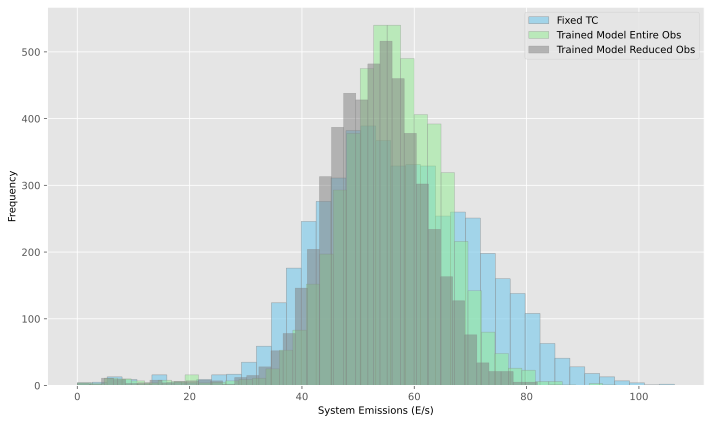

In [34]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

# Histogram for fixed_tc_eval_metrics_averaged_seeds
ax.hist(fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed TC')

# Histogram for trained_eval_metrics_reduced_averaged_seeds
ax.hist(trained_eval_metrics_averaged_seeds["system_abs_accel"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='Trained Model Entire Obs')

# Histogram for trained_eval_metrics_reduced_averaged_seeds
ax.hist(trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='Trained Model Reduced Obs')

# Set titles and labels
# ax.set_title('System Absolute Acceleration Comparison')
ax.set_xlabel('System Emissions (E/s)')
ax.set_ylabel('Frequency')

# Add legend
ax.legend()

# Display plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [35]:
def generate_time_series_comparison_plot(key, ax):

    # Histogram for fixed_tc_eval_metrics_averaged_seeds
    ax.plot(fixed_tc_eval_metrics_averaged_seeds[key], color='skyblue', alpha=0.7, label='Fixed TC')

    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(trained_eval_metrics_averaged_seeds[key], color='lightgreen', alpha=0.7, label='Trained Model CTDE')

    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(trained_eval_metrics_reduced_averaged_seeds[key], color='grey', alpha=0.7, label='Trained Model DTCE')


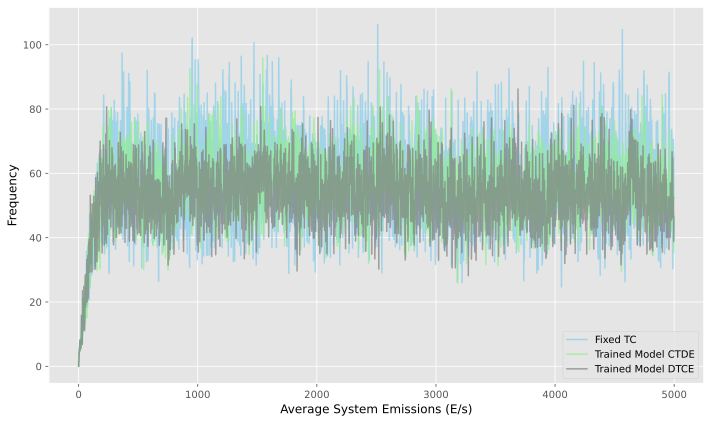

In [36]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

generate_time_series_comparison_plot("system_abs_accel", ax)

# Set titles and labels
# ax.set_title('System Absolute Acceleration Comparison')
ax.set_xlabel('Average System Emissions (E/s)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add legend
ax.legend()

# Display plot
plt.tight_layout(rect=[0,0,1,1])
plt.show()

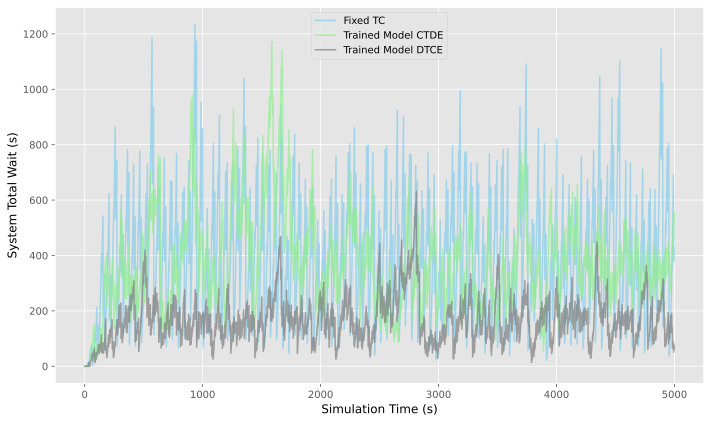

In [37]:
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

generate_time_series_comparison_plot("sys_total_wait", ax)

ax.set_xlabel('Simulation Time (s)', fontsize=12)
ax.set_ylabel('System Total Wait (s)', fontsize=12)
ax.legend()
plt.tight_layout(rect=[0,0,1,1])
plt.show()

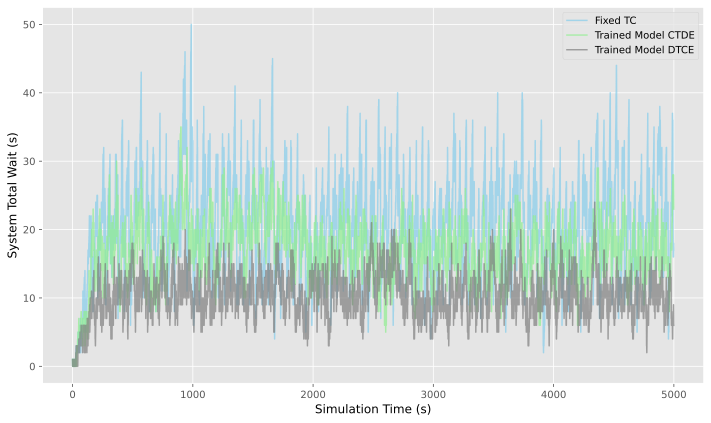

In [38]:
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

generate_time_series_comparison_plot("sys_total_stopped", ax)

ax.set_xlabel('Simulation Time (s)', fontsize=12)
ax.set_ylabel('System Total Wait (s)', fontsize=12)
ax.legend()
plt.tight_layout(rect=[0,0,1,1])
plt.show()

In [39]:
# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(4, 4, figsize=(17,12))

ids = [["A3", "B3", "C3", "D3"],
      ["A2", "B2", "C2", "D2"],
       ["A1", "B1", "C1", "D1"],
       ["A0", "B0", "C0", "D0"]]

for x in range(0,4):
    for y in range(0,4):
        id = ids[x][y]

        ax[x, y] # (0, 0), (0, 1), (0, 2), 0,3) 

        # Histogram for fixed_tc_eval_metrics_averaged_seeds
        ax[x, y].plot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='skyblue', alpha=0.7) # label='Fixed TC')
        # Histogram for trained_eval_metrics_reduced_averaged_seeds
        ax[x, y].plot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='lightgreen', alpha=0.5) # label='CTDE'
        # Histogram for trained_eval_metrics_reduced_averaged_seeds
        ax[x, y].plot(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], color='grey', alpha=0.5) # label='DTDE')

        # ax[x, y].set_xlabel("Simulation Seconds (s)")
        # ax[x, y].set_ylabel("Emissions (E/s)")
        ax[x, y].legend(title=f"Policy_{id}", title_fontsize=10, fontsize=10, loc='upper right')

ax[3, 0].set_xlabel("Simulation Seconds (s)")
ax[3, 0].set_ylabel("Emissions (E/s)")
ax[3, 0].legend(['DTDE', "CTDE", "Fixed TC"], title=f"Policy_{id}", title_fontsize=10, fontsize=10, loc='upper right')

# Display plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

In [40]:
trained_eval_metrics_averaged_seeds.columns

Index(['sim_time', 'episode_num', 'system_abs_accel', 'sys_total_stopped', 'sys_total_wait', 'sys_avg_wait', 'sys_avg_speed', 'sys_arrived_vehicles_at_destination', 'sys_accum_waiting_time', 'A0_abs_accel', 'A0_stopped', 'A0_average_speed', 'A0_accumulated_waiting_time', 'A0_waiting_time', 'A1_abs_accel', 'A1_stopped', 'A1_average_speed', 'A1_accumulated_waiting_time', 'A1_waiting_time', 'A2_abs_accel', 'A2_stopped', 'A2_average_speed', 'A2_accumulated_waiting_time', 'A2_waiting_time', 'A3_abs_accel', 'A3_stopped', 'A3_average_speed', 'A3_accumulated_waiting_time', 'A3_waiting_time', 'B0_abs_accel', 'B0_stopped', 'B0_average_speed', 'B0_accumulated_waiting_time', 'B0_waiting_time', 'B1_abs_accel', 'B1_stopped', 'B1_average_speed', 'B1_accumulated_waiting_time', 'B1_waiting_time', 'B2_abs_accel', 'B2_stopped', 'B2_average_speed', 'B2_accumulated_waiting_time', 'B2_waiting_time', 'B3_abs_accel', 'B3_stopped', 'B3_average_speed', 'B3_accumulated_waiting_time', 'B3_waiting_time',
       'C

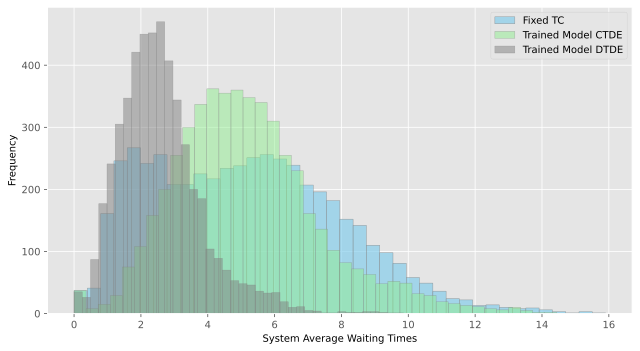

In [41]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 5))

# Histogram for fixed_tc_eval_metrics_averaged_seeds
ax.hist(fixed_tc_eval_metrics_averaged_seeds["sys_avg_wait"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed TC')

# Histogram for trained_eval_metrics_reduced_averaged_seeds
ax.hist(trained_eval_metrics_averaged_seeds["sys_avg_wait"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='Trained Model CTDE')

# Histogram for trained_eval_metrics_reduced_averaged_seeds
ax.hist(trained_eval_metrics_reduced_averaged_seeds["sys_avg_wait"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='Trained Model DTDE')

# Set titles and labels
# ax.set_title('system_waiting_time Comparison')
ax.set_xlabel('System Average Waiting Times')
ax.set_ylabel('Frequency')

# Add legend
ax.legend()

# Display plot
plt.tight_layout(rect=[0,0,1,1])
plt.show()

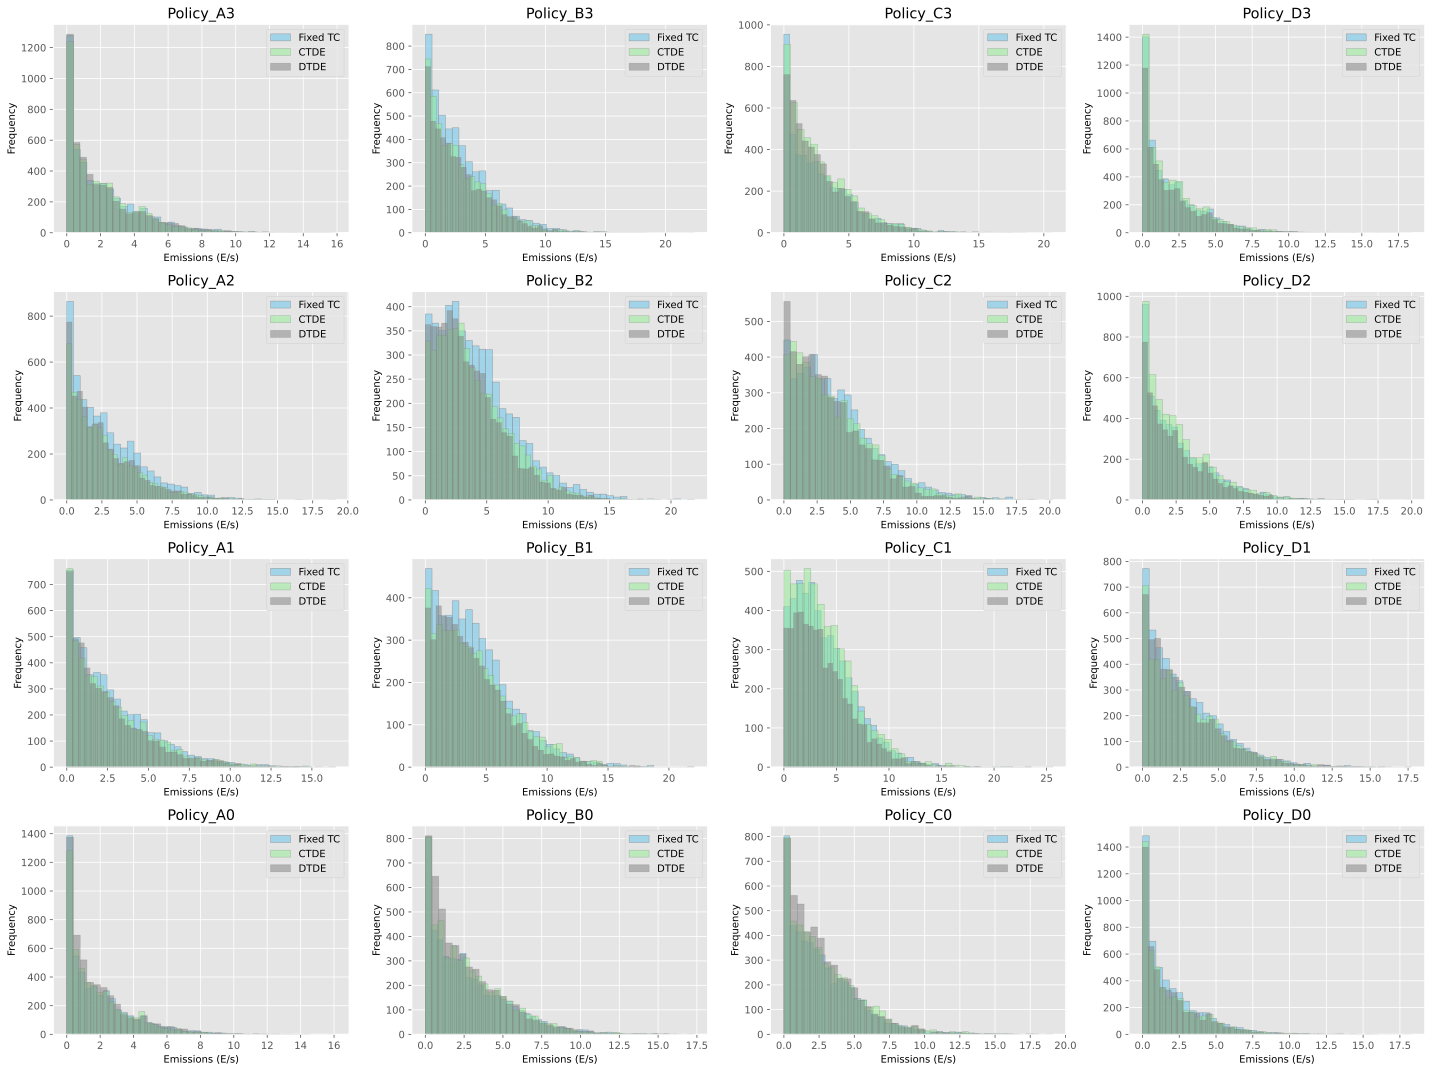

In [42]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(4, 4, figsize=(20,15))

ids = [["A3", "B3", "C3", "D3"],
      ["A2", "B2", "C2", "D2"],
       ["A1", "B1", "C1", "D1"],
       ["A0", "B0", "C0", "D0"]]

for x in range(0,4):
    for y in range(0,4):
        id = ids[x][y]

        ax[x, y] # (0, 0), (0, 1), (0, 2), 0,3) 

        # Histogram for fixed_tc_eval_metrics_averaged_seeds
        ax[x, y].hist(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed TC')
        # Histogram for trained_eval_metrics_reduced_averaged_seeds
        ax[x, y].hist(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='CTDE')
        # Histogram for trained_eval_metrics_reduced_averaged_seeds
        ax[x, y].hist(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='DTDE')

        ax[x, y].set_title(f"Policy_{id}")
        ax[x, y].set_xlabel(f"Emissions (E/s)")
        ax[x, y].set_ylabel('Frequency')
        ax[x, y].legend()

# Display plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

## Extra Metrics during evaluation 

In [45]:
SUMO_SEEDS = [39, 22, 10, 51, 49, 74]
SUMO_SEEDS = [31]

fixed_tc_extra_metrics_concat = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='fixed_tc', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_extra_metrics_concat =  pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_extra_metrics_reduced = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])

In [46]:
all_metrics = [fixed_tc_extra_metrics_concat,
           trained_extra_metrics_concat,
           trained_extra_metrics_reduced]

In [47]:
model_reward_seed = pd.DataFrame([fixed_tc_extra_metrics_concat.sum().iloc[1:],
                                     trained_extra_metrics_concat.sum().iloc[1:],
                                     trained_extra_metrics_reduced.sum().iloc[1:]], 
                                     index=['Fixed Time Control',
                                            'CTCE',
                                            "DTDE"])


In [48]:
model_reward_seed

reward_D1   reward_C1   reward_A0   reward_A3   reward_B0   reward_B2   reward_D3   reward_C0   reward_D0   reward_C2   reward_C3   reward_D2   reward_B1   reward_A1   reward_A2   reward_B3  total_agent_reward
Fixed Time Control -203.878906 -279.233508 -133.280776 -145.962306 -190.697915 -297.089458 -141.570532 -196.506810 -131.652320 -268.771734 -195.596774 -185.322919 -287.077914 -193.678044 -194.223735 -209.453923        -3253.997575
CTCE               -190.296556 -268.408605 -115.512353 -139.565405 -182.716488 -257.963819 -126.314053 -188.325452 -127.640237 -259.544966 -181.363276 -169.424451 -280.616231 -179.436727 -176.019954 -193.079286        -3036.227860
DTDE               -157.575934 -239.437362 -101.536572 -114.285931 -154.513874 -223.385176 -107.919732 -163.107532 -101.907095 -211.851510 -152.694818 -153.237731 -242.926170 -158.601350 -159.130243 -173.710349        -2615.821380

In [49]:
print(agent_rewards.index)

NameError: name 'agent_rewards' is not defined

In [884]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

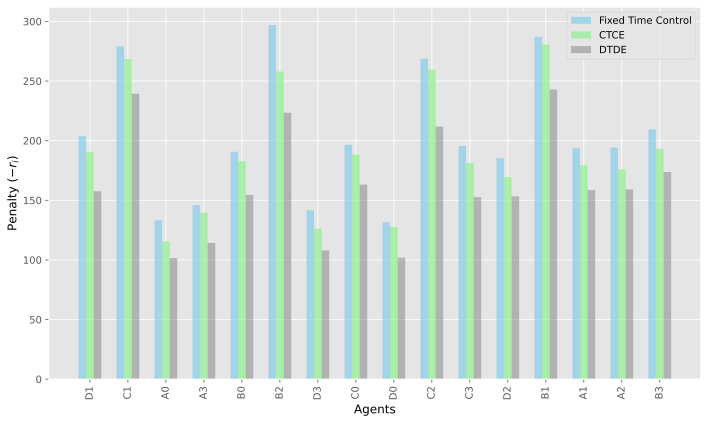

In [885]:
# Plotting the grouped bar chart

agent_rewards = -1*(model_reward_seed.drop(columns=["total_agent_reward"]))
fig, ax = plt.subplots(figsize=(10, 6))

colours = ["skyblue", "lightgreen", "grey"]
alphas = [0.7, 0.7, 0.5]

bar_width = 0.2
x = np.arange(len(agent_rewards.columns))

for i, model in enumerate(agent_rewards.index):
    ax.bar(x + i * bar_width, agent_rewards.loc[model], bar_width, color = colours[i], label=model, alpha=alphas[i])

ax.set_xlabel('Agents', fontsize=12)
ax.set_ylabel(r'Penalty ($-r_i$)', fontsize=12)
# ax.set_title('Agent Rewards by Control Method')
ax.set_xticks(x + bar_width)

cols_names = list(agent_rewards.columns)
xlabels = [agent_name.split("_")[-1] for agent_name in cols_names]

ax.set_xticklabels(xlabels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

## Tests

In [886]:
fixed = fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"] 
model_CTCE = trained_eval_metrics_averaged_seeds["system_abs_accel"]
model_DTDE = trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"]

In [887]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H test
stat, p = kruskal(fixed, model_CTCE, model_DTDE)

print(f'Kruskal-Wallis H test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the groups")

Kruskal-Wallis H test statistic: 322.88440564216745
p-value: 7.700912139302466e-71
Reject the null hypothesis - there is a significant difference between the groups


In [888]:
from scipy.stats import mannwhitneyu
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(fixed, model_DTDE)
                       
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Mann-Whitney U test statistic: 14586789.5
p-value: 2.2653574797573323e-47
Reject the null hypothesis - there is a significant difference between the two groups


In [889]:
from scipy.stats import mannwhitneyu
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(fixed, model_CTCE)
                       
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Mann-Whitney U test statistic: 12777826.5
p-value: 0.0542620492969816
Fail to reject the null hypothesis - no significant difference between the two groups


In [890]:
# Perform the independent t-test
from scipy.stats import ttest_ind, ttest_rel

stat, p = ttest_ind(fixed, model_CTCE)

print(f'Independent t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Independent t-test statistic: 4.3398198560302905
p-value: 1.440013591769901e-05
Reject the null hypothesis - there is a significant difference between the two groups


In [891]:
# Perform the independent t-test
from scipy.stats import ttest_ind, ttest_rel

stat, p = ttest_ind(fixed, model_DTDE)

print(f'Independent t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Independent t-test statistic: 16.659256400080412
p-value: 1.7413654106945136e-61
Reject the null hypothesis - there is a significant difference between the two groups


In [892]:
# Perform the paired t-test
stat, p = ttest_rel(fixed, model_CTCE)

print(f'Paired t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the paired groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the paired groups")

Paired t-test statistic: 5.078669300751598
p-value: 3.9389851232963235e-07
Reject the null hypothesis - there is a significant difference between the paired groups


## Check stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Check stationarity for emissions and waiting times

def generate_adf_stats_eval_metrics(eval_metrics_df):
    adf_result_emissions = adfuller(eval_metrics_df['system_abs_accel'])
    adf_result_waiting = adfuller(eval_metrics_df['sys_accum_waiting_time'])

    stationarity = pd.DataFrame(columns=['ADF Statistic', 'p-value'])
    stationarity.loc['Emissions', 'ADF Statistic'] = adf_result_emissions[0]
    stationarity.loc["Emissions", 'p-value'] = adf_result_emissions[1]

    stationarity.loc['Waiting Times', 'ADF Statistic'] = adf_result_waiting[0]
    stationarity.loc["Waiting Times", 'p-value'] = adf_result_waiting[1]

    return stationarity

In [ ]:
generate_adf_stats_eval_metrics(fixed_tc_eval_metrics_averaged_seeds)

ADF Statistic   p-value
Emissions          -6.38605       0.0
Waiting Times     -3.887698  0.002127

In [ ]:
generate_adf_stats_eval_metrics(trained_eval_metrics_averaged_seeds)

ADF Statistic   p-value
Emissions         -4.701869  0.000083
Waiting Times     -3.664874  0.004635

In [ ]:
generate_adf_stats_eval_metrics(trained_eval_metrics_reduced_averaged_seeds)

ADF Statistic   p-value
Emissions         -5.109491  0.000013
Waiting Times     -3.754393   0.00341

In [ ]:
differences = pd.DataFrame()

differences['diff_model_emissions'] = trained_eval_metrics_averaged_seeds['system_abs_accel'] - fixed_tc_eval_metrics_averaged_seeds['system_abs_accel']
differences['diff_model_delay'] = trained_eval_metrics_averaged_seeds['sys_accum_waiting_time'] - fixed_tc_eval_metrics_averaged_seeds['sys_accum_waiting_time']

differences['diff_reduced_obs_model_emissions'] = trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'] - fixed_tc_eval_metrics_averaged_seeds['system_abs_accel']
differences['diff_reduced_obs_model_delay'] = trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'] - fixed_tc_eval_metrics_averaged_seeds['sys_accum_waiting_time']

differences.columns

Index(['diff_model_emissions', 'diff_model_delay', 'diff_reduced_obs_model_emissions', 'diff_reduced_obs_model_delay'], dtype='object')

## Wilcoxin Significance Tests

In [ ]:
import pandas as pd
from scipy.stats import wilcoxon

# Perform the Wilcoxon Signed-Rank Test
wilcoxon_result_emissions = wilcoxon(differences['diff_model_emissions'])
wilcoxon_result_waiting = wilcoxon(differences['diff_model_delay'])

wilcoxon_result_emissions_reduced_obs = wilcoxon(differences['diff_reduced_obs_model_emissions'])
wilcoxon_result_waiting_reduced_obs = wilcoxon(differences['diff_reduced_obs_model_delay'])

# Print the results
print(f'Wilcoxon Test Result for Model 1 Emissions: {wilcoxon_result_emissions}')
print(f'Wilcoxon Test Result for Model 2 Emissions: {wilcoxon_result_emissions_reduced_obs}')
print(f'Wilcoxon Test Result for Model 1 Waiting Times: {wilcoxon_result_waiting}')
print(f'Wilcoxon Test Result for Model 2 Waiting Times: {wilcoxon_result_waiting_reduced_obs}')

Wilcoxon Test Result for Model 1 Emissions: WilcoxonResult(statistic=1947793.0, pvalue=7.285105163422871e-09)
Wilcoxon Test Result for Model 2 Emissions: WilcoxonResult(statistic=1468813.0, pvalue=3.3974869651655036e-57)
Wilcoxon Test Result for Model 1 Waiting Times: WilcoxonResult(statistic=0.0, pvalue=0.0)
Wilcoxon Test Result for Model 2 Waiting Times: WilcoxonResult(statistic=0.0, pvalue=0.0)


Wilcoxin Significance Results

In [ ]:
columns = ['statistic', 'pvalue']
index = ['Model 1', 'Model 2']

wilcoxin_tests = pd.DataFrame([[wilcoxon_result_emissions.statistic, wilcoxon_result_emissions.pvalue],
                               [wilcoxon_result_emissions_reduced_obs.statistic, wilcoxon_result_emissions_reduced_obs.pvalue]],
                             columns = columns, index=index)
wilcoxin_tests

statistic        pvalue
Model 1  1947793.0  7.285105e-09
Model 2  1468813.0  3.397487e-57

Waiting times significance tests

In [ ]:
columns = ['statistic', 'pvalue']
index = ['model_CTCE', 'model_DTDE']

wilcoxin_tests = pd.DataFrame([[wilcoxon_result_waiting.statistic, wilcoxon_result_waiting.pvalue],
                               [wilcoxon_result_waiting_reduced_obs.statistic, wilcoxon_result_waiting_reduced_obs.pvalue]],
                             columns = columns, index=index)
wilcoxin_tests

statistic  pvalue
model_CTCE        0.0     0.0
model_DTDE        0.0     0.0

Figure {} shows the results of Wilcoxon signed-rank tests for two sets of models compared against a fixed control baseline. 
Both models (Model 1 and Model 2) show statistically significant differences compared to the baseline, as indicated by their very low p-values (much less than 0.05). Model 1 has a smaller p-value than Model 2, suggesting a more significant difference from the baseline.

The low p-values in both tests suggest that the differences observed between the models and the control baseline are statistically significant, meaning it is highly unlikely that these differences are due to random chance.
Model 1 seems to have a more pronounced effect in both cases (Wilcoxon Test and Waiting times) given its lower p-values compared to Model 2.

## Compare diff_accum_wait time

In [ ]:
TRAINED_CHECKPOINT_PATHS = ["local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5", 
                            "local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1"]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join(os.path.abspath('../'), x) for x in TRAINED_CHECKPOINT_PATHS]
print(TRAINED_CHECKPOINT_PATHS_ABS)

['/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5', '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1']


In [ ]:
fixed_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=10)
trained_0_5_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)
trained_1_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)

fixed_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=22)
trained_0_5_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)
trained_1_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)

fixed_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=39)
trained_0_5_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)
trained_1_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)

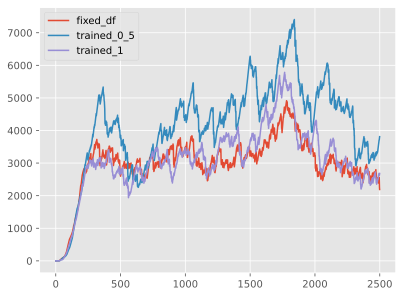

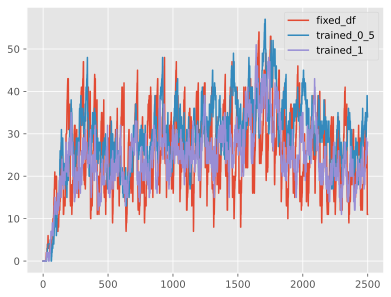

In [ ]:
import matplotlib.pyplot as plt

fixed_df_seed_10['sys_accum_waiting_time'].plot(legend='fixed_df')
trained_0_5_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

fixed_df_seed_10['sys_total_stopped'].plot(legend=['fixed_df'])
trained_0_5_df_seed_10['sys_total_stopped'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_total_stopped'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()